# NSynth Example
This program takes the NSynth dataset and prints an example set of data. The dataset can be downloaded from https://magenta.tensorflow.org/datasets/nsynth in two different formats: JSON and TFRecord. JSON is based on JavaScript and sorts the data into objects with names and values. TFRecord is based on tensorflow and is structured similarly. The data is sorted into a list and an example protocol buffer is used to determine where the data is located. The example protocol buffer for the NSynth dataset is shown below:

# Load Packages

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython.display import Audio

tfrecords_filename = 'nsynth-test.tfrecord'

# Define Parsing Function
The function takes the file name and outputs the defined NSynth data and audio for one example based on the structure of the protocol buffer.

In [3]:
def nsynth_generator(tfrecords_filename):
    for serialized_example in tf.python_io.tf_record_iterator(tfrecords_filename):
        example = tf.train.Example()
        example.ParseFromString(serialized_example)
        f = example.features.feature

        audio = np.array(f['audio'].float_list.value)

        data = {
            'note':
                f['note'].int64_list.value[0],
            'note_str':
                f['note_str'].bytes_list.value[0],
            'instrument':
                f['instrument'].int64_list.value[0],
            'instrument_str':
                f['instrument_str'].bytes_list.value[0],
            'pitch':
                f['pitch'].int64_list.value[0],
            'velocity':
                f['pitch'].int64_list.value[0],
            'samplerate':
                f['sample_rate'].int64_list.value[0],
            'qualities':
                map(int, f['qualities'].int64_list.value),
            'qualities_str':
                map(str, f['qualities_str'].int64_list.value),
            'instrument_family':
                f['instrument_family'].int64_list.value[0],
            'instrument_family_str':
                f['instrument_family_str'].bytes_list.value[0],
            'instrument_source':
                f['instrument_family'].int64_list.value[0],
            'instrument_source_str':
                f['instrument_source_str'].bytes_list.value[0],
        }

        yield data, audio

# Get data
Next, get the data using the function. Print the sample data...

In [8]:
gen_samples = nsynth_generator(tfrecords_filename)
metadata, audio = gen_samples.__next__()
print(metadata)

{'note': 149013, 'note_str': b'bass_synthetic_033-100-100', 'instrument': 417, 'instrument_str': b'bass_synthetic_033', 'pitch': 100, 'velocity': 100, 'samplerate': 16000, 'qualities': <map object at 0x0000014049EDE898>, 'qualities_str': <map object at 0x000001404A062160>, 'instrument_family': 0, 'instrument_family_str': b'bass', 'instrument_source': 0, 'instrument_source_str': b'synthetic'}


... and plot the sample audio signal.

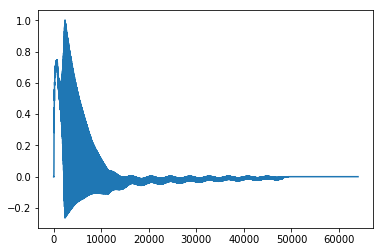

In [11]:
Audio(audio, rate=metadata['samplerate'])
plt.plot(audio)

The NSynth training dataset contains 289,205 examples, the validation dataset contains 12,678 examples, and the test dataset contains 4,096 examples. Each example contains these 13 data values and an audio signal consisting of over 60,000 samples.